# Real Impact Of Inflation

Our project is to uncover the difference between the reported and actual urban inflation. We will be using the CPI data, from the Bureau of Labor Statistics, with and without food and energy costs to answer this question. Additionally, we will also be analyzing the differences in inflation between the various US regions, compared to the national average, over time.

## The Data
@TODO: Insert description of the BLS data

In [40]:
# Importing dependencies
import numpy as np
import pandas as pd
import plotly.express as px
import panel as pn
import hvplot.pandas
import geoviews as gv
import cartopy.crs as ccrs
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import datetime

### Reading/Pre-Processing the Data

In [41]:
# List of non-regional csv titles
non_regional_csv_titles = ['All','Energy','Food','Gasoline', 'Less-Food-Energy']
# List of regional csv titles
regional_csv_titles = ['Midwest', 'Northeast', 'South', 'West']

In [42]:
class Df_Processor:
    # Constructor
    def __init__(self,titles,is_regional=False):
        # Save titles
        self.titles = titles
        # Save is_regional
        self.is_regional = is_regional
        
        # Set empty list for processed DataFrames
        self.processed_dataframes = []
        
        # Run dataframe processing method
        self.process_dfs()

    # Method to get dataframes
    def get_dfs(self):
        # Empty list to hold DataFrames
        dataframes = []
        
        # Looping over csv titles list
        for title in self.titles:
            # Columns to drop
            columns_to_drop = ['HALF1','HALF2']
            
            # If the regional set is 
            if self.is_regional:
                # Add the Annual column
                columns_to_drop.append('Annual')

            # Saving the csv (by title) as DataFrame, making Year the index column and dropping the HALF1 and HALF2 columns
            df = pd.read_csv(Path(f'./Data/{title}.csv')).drop(columns=columns_to_drop).melt(id_vars=['Year'], var_name='Month', value_name='Price')

            # Appending dataframe to dataframes list
            dataframes.append(df)
        
        # Returning all dataframes
        return dataframes

    # Method to data pre-process dataframes
    def process_dfs(self):
        # Dictionary of months and thier numeric values
        months = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
        # Get and loop over DataFrames
        for df in self.get_dfs():
            # Creating Day column and setting values to 1
            df['Day']=1
            # Mapping month from string to int
            df['Month'] = df['Month'].map(months)

            # Creating date column
            df['Date']=pd.to_datetime(dict(year=df.Year, month=df.Month, day=df.Day))
            # Sorting Date values
            df = df.sort_values('Date')
            # Making index Date
            df.index = df['Date']

            # Dropping Year, Month, Day, Date columns
            df = df.drop(columns=['Year','Month','Day','Date'])
            # Dropping NaN values
            df = df.dropna()

            # Adding dataframe to processed_dataframes list
            self.processed_dataframes.append(df)
    
    # Method to return the processed dataframes
    def get_processed_dataframes(self):
        # Return the processed dataframes
        return self.processed_dataframes


In [43]:
# Getting and storing non-regional DataFrames
non_regional_dfs = [all_df, energy_df, food_df, gasoline_df, less_food_energy_df] = Df_Processor(non_regional_csv_titles).get_processed_dataframes()
# Getting and storing regional DataFrames
regional_dfs = [midwest_df, northeast_df, south_df, west_df] = Df_Processor(regional_csv_titles,True).get_processed_dataframes()

In [44]:
# Method to display dataframes and titles
def display_data(df,titles):
    # Looping over csv titles and indexes
    for index, title in enumerate(titles):
        # Printing CSV Title and DataFrame Name
        df_title = 'less_food_energy_df' if title == 'Less-Food-Energy' else title.lower()
        print(f'\033[1mCSV Title\033[0m: {title}.csv\n\033[1mDataFrame Name\033[0m: {df_title}_df')
        # Displaying DataFrame
        display(df[index])
        # Printing new line
        print('\n')

In [45]:
# Printing non-regional data
display_data(non_regional_dfs,non_regional_csv_titles)

CSV Title: All.csv
DataFrame Name: all_df


,Price
Date,
2012-01-01,226.665
2012-02-01,227.663
2012-03-01,229.392
2012-04-01,230.085
2012-05-01,229.815
...,...
2022-05-01,292.296
2022-06-01,296.311
2022-07-01,296.276




CSV Title: Energy.csv
DataFrame Name: energy_df


,Price
Date,
2012-01-01,236.942
2012-02-01,242.663
2012-03-01,253.599
2012-04-01,255.736
2012-05-01,250.306
...,...
2022-05-01,316.761
2022-06-01,340.917
2022-07-01,325.407




CSV Title: Food.csv
DataFrame Name: food_df


,Price
Date,
2012-01-01,232.666
2012-02-01,232.486
2012-03-01,232.792
2012-04-01,233.234
2012-05-01,233.339
...,...
2022-05-01,302.038
2022-06-01,305.041
2022-07-01,308.532




CSV Title: Gasoline.csv
DataFrame Name: gasoline_df


,Price
Date,
2012-01-01,290.762
2012-02-01,305.076
2012-03-01,329.780
2012-04-01,335.742
2012-05-01,323.604
...,...
2022-05-01,391.262
2022-06-01,430.142
2022-07-01,396.952




CSV Title: Less-Food-Energy.csv
DataFrame Name: less_food_energy_df_df


,Price
Date,
2012-01-01,227.237
2012-02-01,227.865
2012-03-01,228.735
2012-04-01,229.303
2012-05-01,229.602
...,...
2022-05-01,292.506
2022-06-01,294.680
2022-07-01,295.646


In [46]:
# Printing regional data
display_data(regional_dfs,regional_csv_titles)

CSV Title: Midwest.csv
DataFrame Name: midwest_df


,Price
Date,
2012-01-01,216.368
2012-02-01,216.855
2012-03-01,218.975
2012-04-01,219.405
2012-05-01,219.145
...,...
2022-05-01,272.673
2022-06-01,277.072
2022-07-01,276.525




CSV Title: Northeast.csv
DataFrame Name: northeast_df


,Price
Date,
2012-01-01,242.879
2012-02-01,243.850
2012-03-01,245.125
2012-04-01,245.850
2012-05-01,245.709
...,...
2022-05-01,302.939
2022-06-01,306.453
2022-07-01,305.916




CSV Title: South.csv
DataFrame Name: south_df


,Price
Date,
2012-01-01,220.497
2012-02-01,221.802
2012-03-01,223.314
2012-04-01,224.275
2012-05-01,223.356
...,...
2022-05-01,283.307
2022-06-01,287.427
2022-07-01,287.608




CSV Title: West.csv
DataFrame Name: west_df


,Price
Date,
2012-01-01,228.980
2012-02-01,229.995
2012-03-01,232.039
2012-04-01,232.561
2012-05-01,233.053
...,...
2022-05-01,309.645
2022-06-01,313.496
2022-07-01,313.951


## Food and Energy Inflation Analysis & Impact on Overall Inflation

The analysis below we will answer the following questions:
 - What is the price movement for Food and Energy? Do we see an inflationary spike above 2%?
 - What is the correlation in price movements of Food, Energy, and All Sectors (Including and Excluding food and energy)?
 - What we can conclude from analysis?

### Analysis / Visualizations

In [47]:
energy_copy = energy_df.copy().rename(columns={"Price":"Energy"})
food_copy = food_df.copy().rename(columns={"Price":"Food"})
all_copy = all_df.copy().rename(columns={"Price":"National"})
less_food_energy_copy = less_food_energy_df.copy().rename(columns={"Price":"National Less F&E"})

data_df = pd.concat([energy_copy, food_copy, all_copy, less_food_energy_copy], axis=1, join="inner")

data_df

,Energy,Food,National,National Less F&E
Date,,,,
2012-01-01,236.942,232.666,226.665,227.237
2012-02-01,242.663,232.486,227.663,227.865
2012-03-01,253.599,232.792,229.392,228.735
2012-04-01,255.736,233.234,230.085,229.303
2012-05-01,250.306,233.339,229.815,229.602
...,...,...,...,...
2022-05-01,316.761,302.038,292.296,292.506
2022-06-01,340.917,305.041,296.311,294.680
2022-07-01,325.407,308.532,296.276,295.646


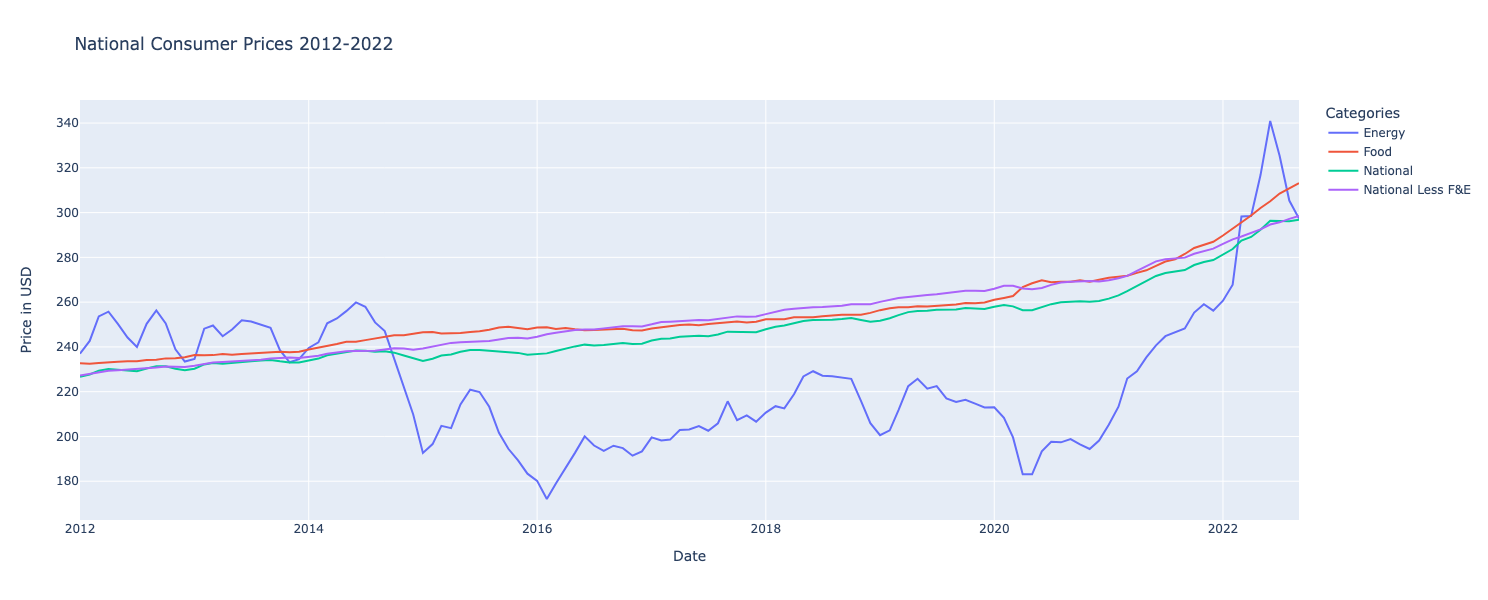

In [48]:
px.line(data_df, 
        labels={'value': 'Price in USD', 'variable': 'Categories'}, 
        title="National Consumer Prices 2012-2022",
       width=1300, height=600)

In [49]:
data_2010s = data_df.loc[:'2019-12-01']
data_2020s = data_df.loc['2020-01-01':]

display(data_2010s.head(), data_2020s.head())

,Energy,Food,National,National Less F&E
Date,,,,
2012-01-01,236.942,232.666,226.665,227.237
2012-02-01,242.663,232.486,227.663,227.865
2012-03-01,253.599,232.792,229.392,228.735
2012-04-01,255.736,233.234,230.085,229.303
2012-05-01,250.306,233.339,229.815,229.602


,Energy,Food,National,National Less F&E
Date,,,,
2020-01-01,213.043,261.057,257.971,266.004
2020-02-01,208.354,261.876,258.678,267.268
2020-03-01,199.573,262.708,258.115,267.312
2020-04-01,183.081,266.757,256.389,266.089
2020-05-01,183.076,268.439,256.394,265.799


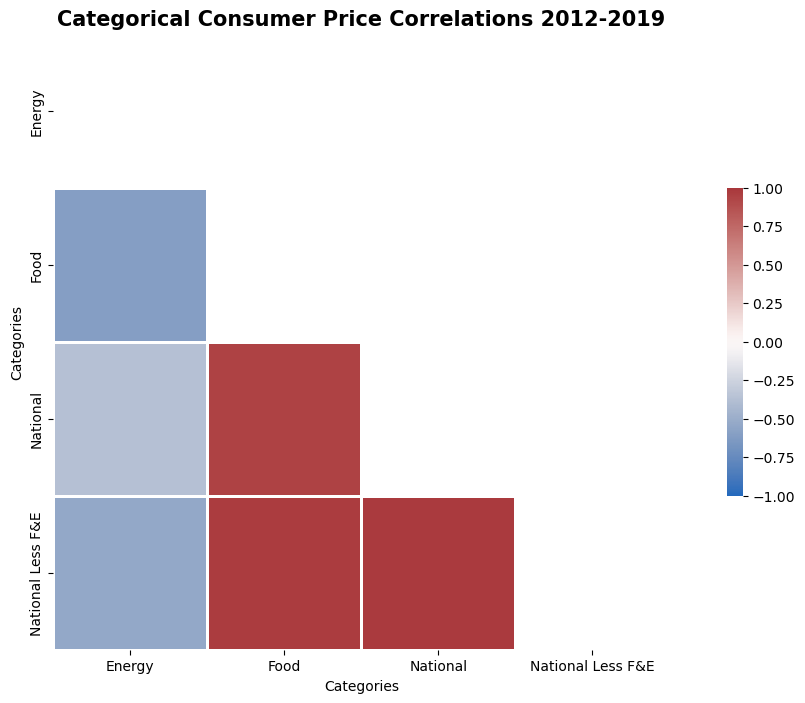

In [50]:
data_2010s_correlation = data_2010s.corr()

plt.figure(figsize=(15,8),)
plt.title("Categorical Consumer Price Correlations 2012-2019", fontsize=15, fontweight='bold')
sns.heatmap(data_2010s_correlation,
                cbar_kws={'shrink': .5},
                mask=np.triu(np.ones_like(data_2010s_correlation, dtype=bool)),
                vmin=-1,
                vmax=1,
                center=0,
                cmap='vlag', 
                linewidth=1,
                square=True).set(xlabel='Categories',
                                 ylabel='Categories');

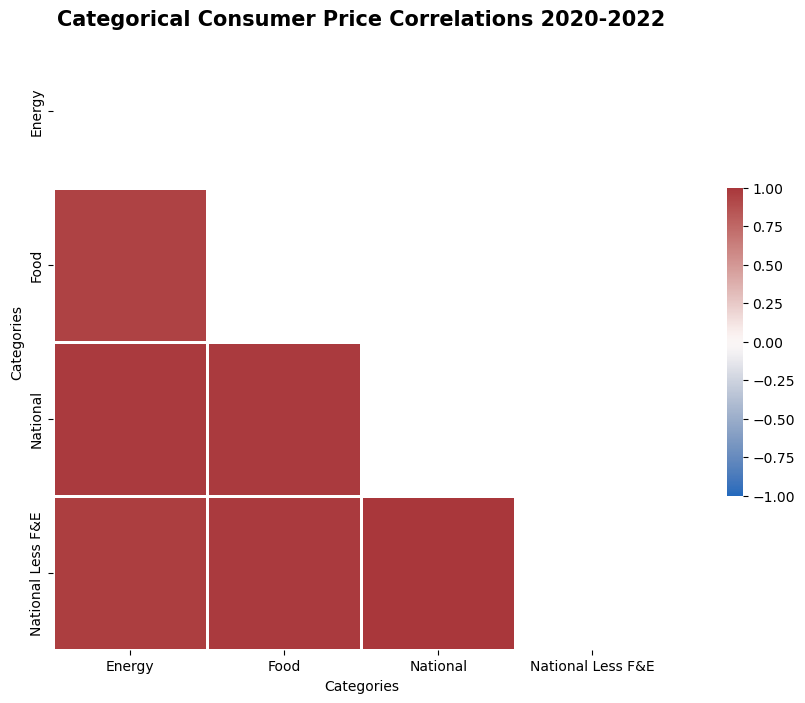

In [51]:
data_2020s_correlation = data_2020s.corr()

plt.figure(figsize=(15,8),)
plt.title("Categorical Consumer Price Correlations 2020-2022", fontsize=15, fontweight='bold')
sns.heatmap(data_2020s_correlation,
                cbar_kws={'shrink': .5},
                mask=np.triu(np.ones_like(data_2020s_correlation, dtype=bool)),
                vmin=-1,
                vmax=1,
                center=0,
                cmap='vlag', 
                linewidth=1,
                square=True).set(xlabel='Categories',
                                 ylabel='Categories');

In [52]:
data_2010s_pctchange = data_2010s.pct_change().dropna()
data_2020s_pctchange = data_2020s.pct_change().dropna()

display(data_2010s_pctchange.head(), data_2020s_pctchange.head())

,Energy,Food,National,National Less F&E
Date,,,,
2012-02-01,0.024145,-0.000774,0.004403,0.002764
2012-03-01,0.045067,0.001316,0.007595,0.003818
2012-04-01,0.008427,0.001899,0.003021,0.002483
2012-05-01,-0.021233,0.000450,-0.001173,0.001304
2012-06-01,-0.024526,0.000960,-0.001466,0.001206


,Energy,Food,National,National Less F&E
Date,,,,
2020-02-01,-0.022010,0.003137,0.002741,0.004752
2020-03-01,-0.042145,0.003177,-0.002176,0.000165
2020-04-01,-0.082636,0.015413,-0.006687,-0.004575
2020-05-01,-0.000027,0.006305,0.000020,-0.001090
2020-06-01,0.056277,0.004958,0.005472,0.001892


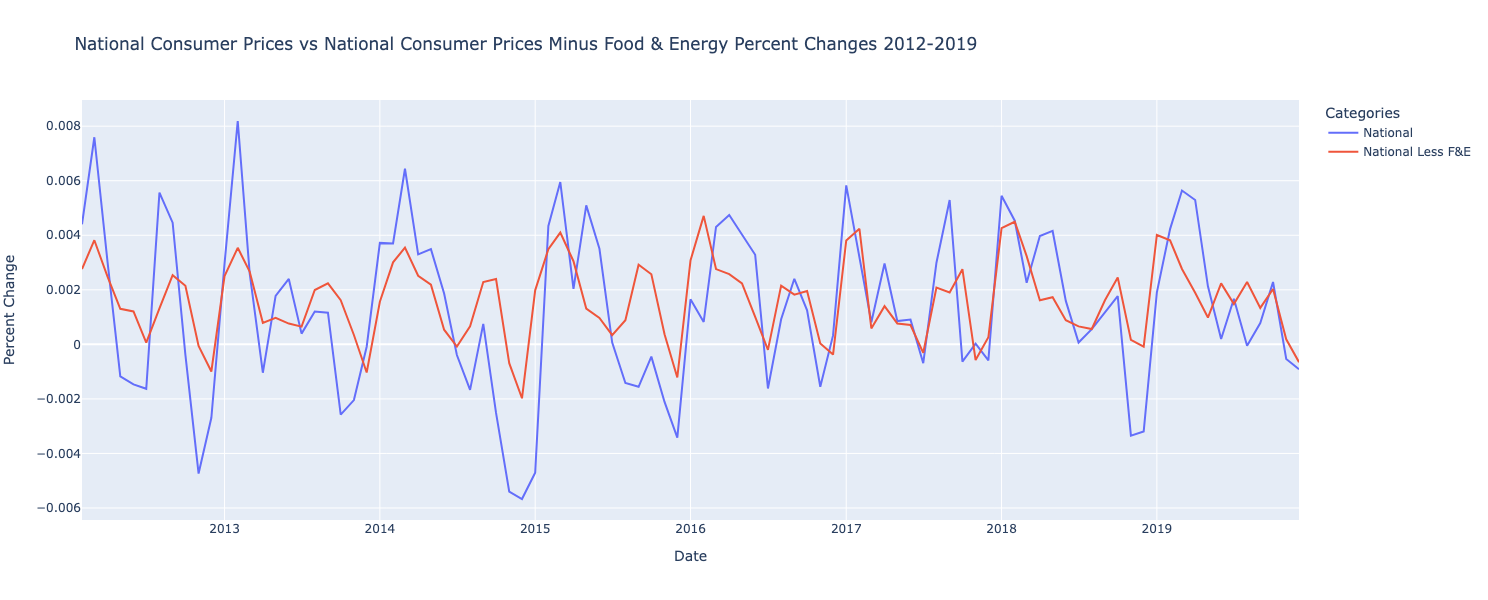

In [53]:
px.line(data_2010s_pctchange[["National", "National Less F&E"]], 
        labels={'value': 'Percent Change', 'variable': 'Categories'}, 
        title="National Consumer Prices vs National Consumer Prices Minus Food & Energy Percent Changes 2012-2019",
       width=1300, height=600)

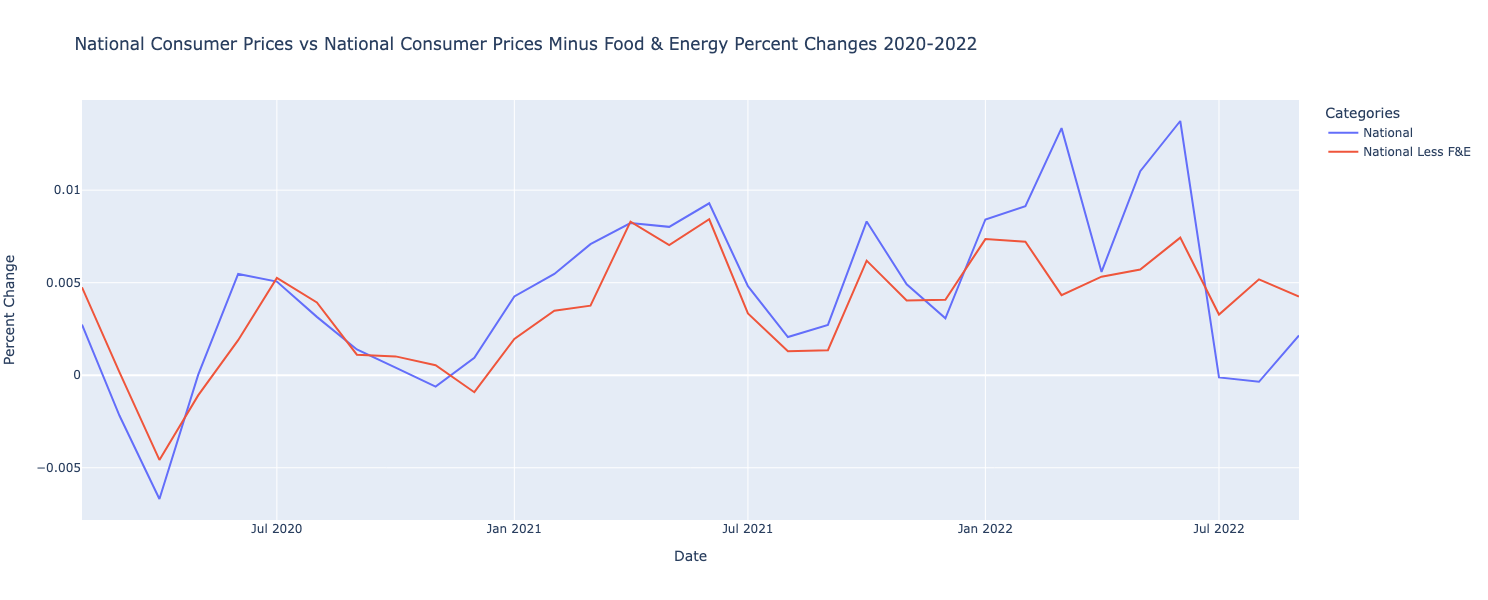

In [55]:
px.line(data_2020s_pctchange[["National", "National Less F&E"]], 
        labels={'value': 'Percent Change', 'variable': 'Categories'}, 
        title="National Consumer Prices vs National Consumer Prices Minus Food & Energy Percent Changes 2020-2022",
       width=1300, height=600)

### Analysis Conclusion & Meaning

- From 2012 to 2022, the price of food increased by approximately $80, while energy by approximitely $60.
    - The increase of prices in these two sectors over a decade is expected, what is important to note is the rate of the increase we start to see in 2020.
    - The average percent change, shortly after April of 2020 and the start of the pandemic, prices increased monthly at higher rates than previously seen.
    
    
- To analyze the correlation of price movements of Food, Energy, and National Pricing we broke them up into two timelines, prior to 2020 and after 2020.
    - Our analysis found that prior to 2020 Energy prices moved completely different from food and national prices. The Energy sector was the only sector with no correlation to all others.
    - After 2020, the story changes substantionally. Energy sector goes from no correlation to almost having a perfect correlation in pricing movements with the food and all sectors.
    

- In conclusion, our analysis shows how high inflationalry times brings high correlations across all sectors. Food and Energy make a substantial impact to overall pricing and therefore to inflation.
    - Inflation was impacted substantially more when you add food and energy.
    - Energy has a very volitine price movement and can therefore have a bigger influence of overall inflation if included in as part of analysis.
    - We can conclude that after 2020, the pandemic, we saw a large increase in prices across all sectors and triggering an inflationary trajectory that the economy faces today.
